## Import Libraries

In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageGrab
import time

## Loading YoLo models

In [2]:
net = cv2.dnn.readNetFromDarknet("yolov2.cfg","yolov3-spp.weights")

In [3]:
classes = []
with open("coco.name","r") as f:
    classes = [line.strip() for line in f.readlines()]

In [4]:
my_img = cv2.imread("Dogcat.jpg")
my_img = cv2.resize(my_img,(1280,720))

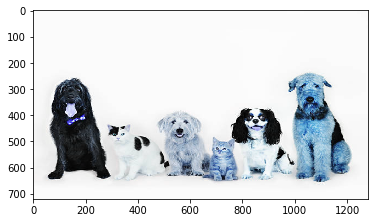

In [5]:
plt.imshow(my_img)

In [6]:
ht,wt, _ = my_img.shape

In [7]:
blob = cv2.dnn.blobFromImage(my_img,1/255,(416,416),(0,0,0),swapRB=True ,crop=False)

In [8]:
blob.shape

(1, 3, 416, 416)

In [9]:
net.setInput(blob)

In [10]:
last_layer = net.getUnconnectedOutLayersNames()

In [11]:
layer_Out = net.forward(last_layer)

In [12]:
layer_Out[0].shape

(845, 85)

In [13]:
boxes = []
confidences = []
class_ids = []
for output in layer_Out:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.5:
            center_x = int(detection[0]*wt)
            center_y = int(detection[1]*ht)
            w = int(detection[2]*wt)
            h = int(detection[3]*ht)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)
            
            

In [14]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
font =  cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size= (len(boxes),3))

In [16]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
    cv2.putText(my_img,label +" "+confidence,(x,y+20),font,2,(0,0,0),2)

cv2.imshow("img",my_img)
cv2.waitkey(0)
cv2.destroyAIWindows()

AttributeError: 'tuple' object has no attribute 'flatten'